In [1]:
import numpy as np
import pandas as pd


# 生成数据
np.random.seed(2046)
d1 = np.random.normal(5, 5, 10)
d2 = np.random.normal(5, 5, 10)
groups = ["d1"] * 10 + ["d2"] * 10
d = {"A": np.concatenate((d1, d2)), "B": groups}
data = pd.DataFrame(d)
data

,A,B
0,6.075330,d1
1,9.420834,d1
2,-0.804424,d1
3,3.921919,d1
4,10.804938,d1
5,-2.600408,d1
6,4.819779,d1
7,-0.720696,d1
8,5.434779,d1
9,1.964238,d1


           A
B           
d1  3.831629
d2  1.545944


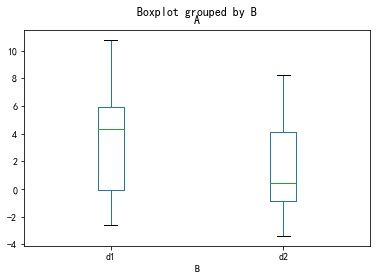

In [3]:
import matplotlib.pyplot as plt


print(data.groupby("B").mean())
data.boxplot("A", by="B", grid=False)
plt.rcParams["axes.unicode_minus"] = False
plt.show()

In [4]:
import statsmodels.api as sm


re = sm.OLS.from_formula("A ~ B", data=data).fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      A   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.550
Date:                Sat, 20 Jul 2019   Prob (F-statistic):              0.229
Time:                        20:42:06   Log-Likelihood:                -55.573
No. Observations:                  20   AIC:                             115.1
Df Residuals:                      18   BIC:                             117.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8316      1.298      2.951      0.009       1.104       6.559
B[T.d2]       -2.2857      1.836     -1.245      0.229      -6.143       1.572
==============================================================================
Omnibus:                        1.339   Durbin-Watson:                   2.804
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.931
Skew:                           0.199   Prob(JB):                        0.628
Kurtosis:                       2.021   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# 打印ANOVA分析结果
aov_table = sm.stats.anova_lm(re, typ=2)
print(aov_table)

              sum_sq    df         F    PR(>F)
B          26.121773   1.0  1.549558  0.229165
Residual  303.436158  18.0       NaN       NaN


In [6]:
# 计算eta sqaured
eta_squared = aov_table["sum_sq"][0] / (aov_table["sum_sq"][0] + aov_table["sum_sq"][1])
eta_squared

0.07926306841913708